In [ ]:
# install kaggle
! pip install kaggle

In [ ]:
# create new directory
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
# copy files in the directory
! cp kaggle.json ~/.kaggle

In [ ]:
# read and write the file and directories
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# download dataset
! kaggle datasets download alessiocorrado99/animals10

 98% 573M/586M [00:05<00:00, 76.3MB/s]
100% 586M/586M [00:05<00:00, 108MB/s] 


In [ ]:
# Extract the zip file
! unzip animals10.zip

Streaming output truncated to the last 5000 lines.
  inflating: raw-img/ragno/OIP-MVQChNQpHiMZEVMPehrvoAHaE6.jpeg  
  inflating: raw-img/ragno/OIP-MVdIFDAFpNyK_XCpwkDIWgHaFj.jpeg  
  inflating: raw-img/ragno/OIP-MYY_8k5AHqMJwTCNXfH6rwHaFj.jpeg  
  inflating: raw-img/ragno/OIP-MZEVXuoMsATG8u_UuTQ6hAHaE8.jpeg  
  inflating: raw-img/ragno/OIP-MZg0tznDRE95AMfyuutuYAHaE6.jpeg  
  inflating: raw-img/ragno/OIP-M_r9DkR2X5gP0P5-z8wPYQHaE7.jpeg  
  inflating: raw-img/ragno/OIP-M_xDUSzjlF3-w9XHCm93cgHaFF.jpeg  
  inflating: raw-img/ragno/OIP-MbI4-bMyutRX3X382IAVcQAAAA.jpeg  
  inflating: raw-img/ragno/OIP-MbMksZdD7gomsC9fd6cpKgHaHJ.jpeg  
  inflating: raw-img/ragno/OIP-Md4AMcvjaHcivJqeW06wEwHaFW.jpeg  
  inflating: raw-img/ragno/OIP-MgCgailkT5XkO1XczzQCngHaLK.jpeg  
  inflating: raw-img/ragno/OIP-MgrKq05YHGXsgj1AmYIyJQHaE8.jpeg  
  inflating: raw-img/ragno/OIP-MhRGx7d8nbnHBuqrsO00EQHaFo.jpeg  
  inflating: raw-img/ragno/OIP-MiVgMXcKGQdog2KGe7i0YQHaHh.jpeg  
  inflating: raw-img/ragno/OIP-Mis0lJf3

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import Sequential,Model
from tensorflow.keras.layers import BatchNormalization,Dropout,Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image
from keras import utils as np_utils
from keras.utils.np_utils import to_categorical
import numpy as np
import pandas as pd
import os
import cv2
import sklearn
from sklearn import model_selection
from sklearn.model_selection import train_test_split
import tensorflow_datasets as tfds

In [ ]:
image_count = len('/content/raw-img')
print(image_count)

16


cane	 elefante  gallina  mucca   ragno
cavallo  farfalla  gatto    pecora  scoiattolo


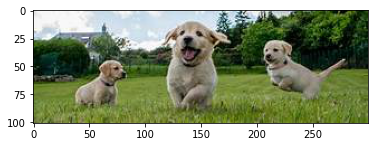

In [ ]:
import numpy as np
import PIL
from PIL import Image
import matplotlib.pyplot as plt
#ls- to list information about files and directories within the system
!ls '/content/raw-img'
#Image.open -opens and identifies the given image file
img_array0 = np.array(Image.open('/content/raw-img/cane/OIP---_cJbI6Ei26w5bW1urHewHaCf.jpeg'))
#Displays data as an image
plt.imshow(img_array0)

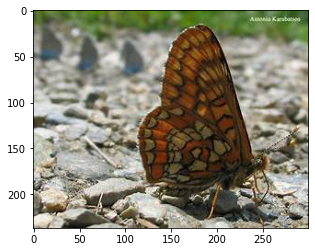

In [ ]:
img_array1 = np.array(Image.open('/content/raw-img/farfalla/OIP--BwCcfYAvrI0U8yYgWplXwHaF1.jpeg'))
#Displays data as an image
plt.imshow(img_array1)

In [ ]:
train_data_dir='/content/raw-img'
img_height=128
img_width=128
#batch_size: No. of images to be yielded from the generator per batch.
batch_size=64
nb_epochs=1

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) 

In [ ]:
#read the images from a big numpy array and folders containing images.
train_generator = train_datagen.flow_from_directory(
    #directory to the path where folders are present
    train_data_dir,
    #resize every image to given size
    target_size=(img_height, img_width),
    batch_size=batch_size,
    #set to“categorical”, in case if you’re developing an Autoencoder system, both input and the output would probably be the same image, for this case set to “input”.
    class_mode ="categorical",
)

Found 26179 images belonging to 10 classes.


In [ ]:
validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
)

Found 26179 images belonging to 10 classes.


In [ ]:
model = Sequential()
inputShape = (128, 128, 3)
model.add(Conv2D(64, (3, 3), padding="same", activation='relu', input_shape=inputShape))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.4))
model.add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu')) 
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 64)      1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 64)      256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        51232     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

In [ ]:
#compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [33]:
#train the model,this step takes alot of time (hours)
model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = 4)

Epoch 1/4
409/409 [==============================] - 2135s 5s/step - loss: 1.0008 - accuracy: 0.6569 - val_loss: 0.9776 - val_accuracy: 0.6609
Epoch 2/4
409/409 [==============================] - 2139s 5s/step - loss: 0.9836 - accuracy: 0.6608 - val_loss: 0.8864 - val_accuracy: 0.7029
Epoch 3/4
409/409 [==============================] - 2146s 5s/step - loss: 0.9492 - accuracy: 0.6769 - val_loss: 0.8385 - val_accuracy: 0.7139
Epoch 4/4
409/409 [==============================] - 2151s 5s/step - loss: 0.9517 - accuracy: 0.6763 - val_loss: 0.9366 - val_accuracy: 0.6879


In [28]:
model.predict(validation_generator)

array([[2.7864041e-02, 7.9059222e-04, 2.7758870e-04, ..., 1.6277665e-02,
        1.2822889e-04, 3.4348592e-03],
       [6.8938929e-01, 5.1138778e-03, 1.8758227e-03, ..., 3.9885836e-03,
        2.6271872e-02, 1.5034460e-01],
       [2.2504169e-01, 1.6117108e-01, 1.4106697e-01, ..., 2.6883133e-02,
        9.4779469e-02, 3.6370382e-02],
       ...,
       [2.4127549e-02, 1.5099664e-02, 1.6022487e-02, ..., 6.3037640e-01,
        7.7241093e-02, 1.0793765e-02],
       [5.7366717e-01, 2.9409679e-02, 7.7519403e-03, ..., 3.1191757e-02,
        3.7183505e-03, 1.6694436e-02],
       [1.4458981e-01, 5.2262332e-02, 9.4377073e-03, ..., 4.3735571e-02,
        8.4769102e-03, 6.8653032e-02]], dtype=float32)

In [29]:
model.evaluate(validation_generator)

410/410 [==============================] - 455s 1s/step - loss: 1.6087 - accuracy: 0.4336


[1.6087013483047485, 0.4336300194263458]